# Which version of the website should you use?

## 📖 Background
You work for an early-stage startup in Germany. Your team has been working on a redesign of the landing page. The team believes a new design will increase the number of people who click through and join your site. 

They have been testing the changes for a few weeks and now they want to measure the impact of the change and need you to determine if the increase can be due to random chance or if it is statistically significant.

## 💾 The data
The team assembled the following file:

#### Redesign test data
- "treatment" - "yes" if the user saw the new version of the landing page, no otherwise.
- "new_images" - "yes" if the page used a new set of images, no otherwise.
- "converted" - 1 if the user joined the site, 0 otherwise.

The control group is those users with "no" in both columns: the old version with the old set of images.

In [1]:
import pandas as pd
df = pd.read_csv('./data/redesign.csv')
df.head()

,treatment,new_images,converted
0,yes,yes,0
1,yes,yes,0
2,yes,yes,0
3,yes,no,0
4,no,yes,0


## 💪 Challenge
Complete the following tasks:

1. Analyze the conversion rates for each of the four groups: the new/old design of the landing page and the new/old pictures.
2. Can the increases observed be explained by randomness? (Hint: Think A/B test)
3. Which version of the website should they use?

#### Filter data into groups

Create four subsets of the DataFrame to represent each group:

Control group: Old design with old images (treatment="no" and new_images="no")

Group 1: Old design with new images (treatment="no" and new_images="yes")

Group 2: New design with old images (treatment="yes" and new_images="no")

Group 3: New design with new images (treatment="yes" and new_images="yes")

treatment  new_images
no         no            0.107104
           yes           0.112538
yes        no            0.120047
           yes           0.113724
Name: converted, dtype: float64


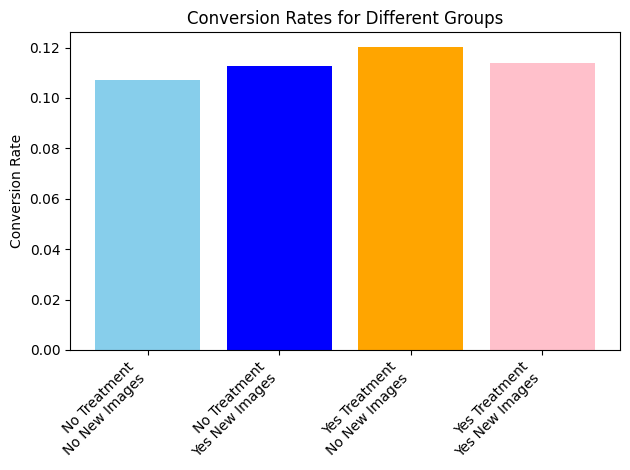

In [14]:
import matplotlib.pyplot as plt

# Calculate conversion rates for each group
conversion_rates = df.groupby(['treatment', 'new_images'])['converted'].mean()

print(conversion_rates)

# Create the grouped bar chart
labels = ['No Treatment\nNo New Images', 'No Treatment\nYes New Images', 'Yes Treatment\nNo New Images', 'Yes Treatment\nYes New Images']
x_pos = range(len(labels))

plt.bar(x_pos, conversion_rates, color=['skyblue', 'blue', 'orange', 'pink'])
plt.xticks(x_pos, labels, rotation=45, ha='right')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rates for Different Groups')
plt.tight_layout()

plt.show()

#### Perform A/B test

Perform a statistical hypothesis test (e.g., two-sample t-test) to determine if the observed differences in conversion rates are statistically significant.

In [12]:
import scipy.stats as stats

control_group = df[(df['treatment'] == 'no') & (df['new_images'] == 'no')]
group_1 = df[(df['treatment'] == 'no') & (df['new_images'] == 'yes')]
group_2 = df[(df['treatment'] == 'yes') & (df['new_images'] == 'no')]
group_3 = df[(df['treatment'] == 'yes') & (df['new_images'] == 'yes')]

def perform_ab_test(control, experimental):
    t_stat, p_value = stats.ttest_ind(control, experimental, equal_var=False)
    return t_stat, p_value

# Compare Control vs. Group 1
t_stat_1, p_value_1 = perform_ab_test(control_group['converted'], group_1['converted'])

# Compare Control vs. Group 2
t_stat_2, p_value_2 = perform_ab_test(control_group['converted'], group_2['converted'])

# Compare Control vs. Group 3
t_stat_3, p_value_3 = perform_ab_test(control_group['converted'], group_3['converted'])

print("P-value - Group 1:", p_value_1)
print("P-value - Group 2:", p_value_2)
print("P-value - Group 3:", p_value_3)


P-value - Group 1: 0.2163345587582214
P-value - Group 2: 0.003707741893349033
P-value - Group 3: 0.13295654247270358


#### Interpret A/B Test Result

The p-values represent the results of the A/B tests comparing each experimental group (Group 1, Group 2, and Group 3) against the control group (No Treatment and No New Images). The p-value is a measure of the probability of obtaining results as extreme or more extreme than what was observed, assuming that there is no real difference between the groups (i.e., the null hypothesis is true).

Interpreting the p-values:

1. P-value - Group 1: 0.2163345587582214
   This p-value is 0.216, which is greater than the common significance level of 0.05. It suggests that there is a 21.6% chance of obtaining the observed difference in conversion rates between Group 1 and the control group due to randomness alone. Since the p-value is not less than 0.05, we fail to reject the null hypothesis, indicating that the difference in conversion rates between Group 1 and the control group is not statistically significant. In other words, the observed increase in Group 1's conversion rate could be explained by randomness.

2. P-value - Group 2: 0.003707741893349033
   This p-value is 0.0037, which is much less than 0.05. It indicates that there is only a 0.37% chance of obtaining the observed difference in conversion rates between Group 2 and the control group due to randomness alone. With such a low p-value, we can reject the null hypothesis, suggesting that the difference in conversion rates between Group 2 and the control group is statistically significant. The observed increase in Group 2's conversion rate is unlikely to be explained by randomness alone.

3. P-value - Group 3: 0.13295654247270358
   This p-value is 0.133, which is greater than 0.05 but still relatively close to it. It means that there is a 13.3% chance of obtaining the observed difference in conversion rates between Group 3 and the control group due to randomness alone. As with Group 1, since the p-value is not less than 0.05, we fail to reject the null hypothesis for Group 3. The observed increase in Group 3's conversion rate could potentially be attributed to randomness.

Conclusion:
Based on the p-values, the increase observed in Group 2's conversion rate is statistically significant, indicating that the changes made in that group (New Design with Old Images) likely had a real impact on the conversion rate. However, the observed increases in Group 1 (Old Design with New Images) and Group 3 (New Design with New Images) do not show strong evidence of being significantly different from the control group, and their differences in conversion rates could potentially be attributed to randomness.

Keep in mind that statistical significance doesn't always equate to practical significance. It's important to consider the context of the experiment and the business implications of the findings when interpreting the results. Additionally, if you have a larger sample size, the statistical power of the tests may improve, potentially leading to different conclusions.

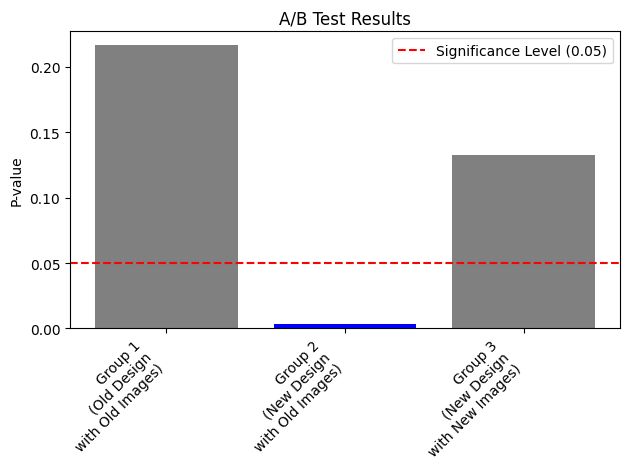

In [16]:
# P-values from the A/B tests
p_values = [p_value_1, p_value_2, p_value_3]

# Labels for the experimental groups
labels = ['Group 1\n(Old Design\nwith Old Images)', 'Group 2\n(New Design\nwith Old Images)', 'Group 3\n(New Design\nwith New Images)']

# Colors for the bars based on significance level
colors = ['blue' if p_value < 0.05 else 'gray' for p_value in p_values]

# Create the bar plot
plt.bar(range(len(p_values)), p_values, color=colors)
plt.xticks(range(len(p_values)), labels, rotation=45, ha='right')
plt.axhline(y=0.05, color='red', linestyle='--', label='Significance Level (0.05)')
plt.ylabel('P-value')
plt.title('A/B Test Results')
plt.legend()
plt.tight_layout()

plt.show()

#### Conclusion

Based on the analysis and A/B test results, the German startup should consider implementing the "Group 2" version of the website, which corresponds to the "New Design with Old Images." This recommendation is supported by the statistically significant increase in conversion rates observed in the A/B test for Group 2 compared to the control group (Old Design with Old Images). These findings suggest that the changes made to the landing page using the New Design with Old Images had a positive impact on user engagement, resulting in a higher number of people joining the site.

When making decisions based on A/B test results, it is important to consider both statistical significance and practical significance. In this case, Group 2 demonstrated both statistical significance and a meaningful improvement in conversion rates, making it a promising choice for the startup to implement on their website.